Mounted at /content/drive


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                                Reviews Sentiments
0     লটির পো ) ভালোই প্রথম দিনেই বেশ বড় সাইজের একটা...  Negative 
1     এদের কাছ থেকে প্রডাক্ট নেওয়ার থেকে বাড়া  নিজে ...  Negative 
2     অডার করছিলাম ৪ বা ৫ তারিখ হতে বাড়া  পারে তার প...  Negative 
3                     হারামজাদা | বক্স ভিজা ছিল বাড়া  `  Negative 
4        বোতলের মুখ ভাংগা ছিল পুরাই ফালতু _ হারামজাদা -  Negative 
...                                                 ...        ...
3567  আলহামদুলিল্লাহ = বীজ সঠিক সময়ে হাতে পেয়েছি ভাল...   Positive
3568  যা ভেবেছিলাম তারচেয়ে অনেক ভালো ধন্যবাদ  আমার ভ...   Positive
3569  ভালোই ছিলো প্যাকেজিং ১০ টা ম্যাস্ক ছিলো সিল দে...   Positive
3570                   খুব ভালো মানের মাক্স  অসাধারণ  :   Positive
3571    চোখ বন্ধ করে কিনে ফালান অনেক ভালো  খুবই ভালো  +   Positive

[3572 rows x 2 columns]


<ipython-input-1-2c2567654721>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiments', data=Data, palette=colors.values())  # Pass values of the colors dictionary


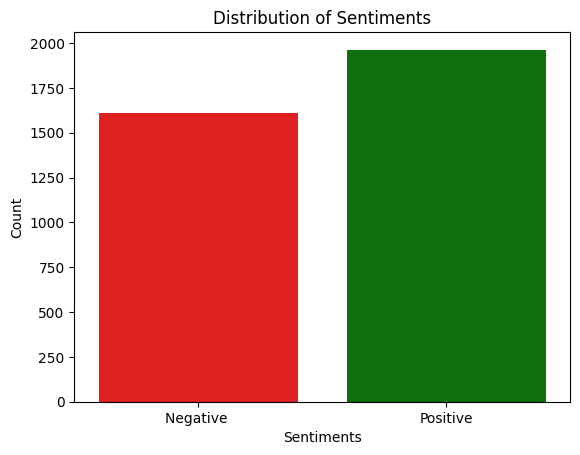

                                                Reviews Sentiments
0     লটির পো ভালোই প্রথম দিনেই বেশ বড় সাইজের একটা ধ...  negative 
1     এদের কাছ থেকে প্রডাক্ট নেওয়ার থেকে বাড়া নিজে গ...  negative 
2     অডার করছিলাম বা তারিখ হতে বাড়া পারে তার পরে ক্...  negative 
3                          হারামজাদা বক্স ভিজা ছিল বাড়া  negative 
4            বোতলের মুখ ভাংগা ছিল পুরাই ফালতু হারামজাদা  negative 
...                                                 ...        ...
3567  আলহামদুলিল্লাহ বীজ সঠিক সময়ে হাতে পেয়েছি ভালোই...   positive
3568  যা ভেবেছিলাম তারচেয়ে অনেক ভালো ধন্যবাদ আমার ভা...   positive
3569  ভালোই ছিলো প্যাকেজিং  টা ম্যাস্ক ছিলো সিল দেয়া...   positive
3570                       খুব ভালো মানের মাক্স অসাধারণ   positive
3571        চোখ বন্ধ করে কিনে ফালান অনেক ভালো খুবই ভালো   positive

[3572 rows x 2 columns]
                                                Reviews Sentiments  \
0     লটির পো ভালোই প্রথম দিনেই বেশ বড় সাইজের একটা ধ...  negative    
1     এদের কাছ থেকে প্রডাক্ট নে

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import re
import string
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
import numpy as np
!pip install nltk
import nltk
nltk.download('punkt')
# Load the data
Data = pd.read_excel("/content/drive/MyDrive/Thesis/Product Review Sentiment Analysis.xlsx")
print(Data)

import seaborn as sns
import matplotlib.pyplot as plt

# Define color palette
colors = {'negative': 'red', 'positive': 'green'}

# Plot the count of sentiments with specified palette
sns.countplot(x='Sentiments', data=Data, palette=colors.values())  # Pass values of the colors dictionary

# Set labels and title
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')

# Show the plot
plt.show()

# Preprocessing Text
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub('<[^<]+?>', '', text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    # Remove single characters
    text = ' '.join([word for word in text.split() if len(word) > 1])
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove leading and trailing spaces
    text = text.strip()
    return text

Data['Reviews'] = Data['Reviews'].apply(lambda x: preprocess_text(x) if pd.notnull(x) else x)

Data['Sentiments'] = Data['Sentiments'].str.lower()
print(Data)

# Remove Bangla stopwords
bangla_stopwords = [
    'এই', 'সে', 'এ', 'তার', 'যে', 'আমাদের', 'তাদের', 'আমরা', 'তোমরা',
    'তুমি', 'তারা', 'যার', 'কোন', 'কিছু', 'এক', 'অনেক', 'অধিক', 'সব',
    'কত', 'কোথায়']
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in bangla_stopwords]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

Data['Cleaned_Reviews'] = Data['Reviews'].apply(remove_stopwords)
from gensim.models import Word2Vec

print(Data)
# Tokenization
def tokenize_text(text):
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    tokens = word_tokenize(text)
    return tokens

Data['Tokenized_Reviews'] = Data['Reviews'].apply(lambda x: tokenize_text(x) if pd.notnull(x) else x)

# Remove null values
Data = Data.dropna(subset=['Tokenized_Reviews'])
print(Data)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Tokenize the reviews
Data['Tokenized_Reviews'] = Data['Reviews'].apply(tokenize_text)

# Convert tokenized reviews back to text for TF-IDF vectorization
Data['Tokenized_Text'] = Data['Tokenized_Reviews'].apply(lambda tokens: ' '.join(tokens))

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the tokenized text to obtain TF-IDF vectors
tfidf_vectors = tfidf_vectorizer.fit_transform(Data['Tokenized_Text'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, Data['Sentiments'], test_size=0.2, random_state=42)

# Convert sentiments into numerical labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, LSTM, Flatten

# Reshape TF-IDF vectors to match the input requirements of Logistic Regression
X_train_reshaped = X_train.toarray().reshape(X_train.shape[0], X_train.shape[1])
X_test_reshaped = X_test.toarray().reshape(X_test.shape[0], X_test.shape[1])


In [ ]:
# Build a Logistic Regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# Train the model
logreg.fit(X_train_reshaped, y_train)

# Evaluate the model
y_pred = logreg.predict(X_test_reshaped)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define labels for confusion matrix
labels = ['Negative', 'Positive']



Accuracy: 0.9496503496503497
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       340
           1       0.96      0.94      0.95       375

    accuracy                           0.95       715
   macro avg       0.95      0.95      0.95       715
weighted avg       0.95      0.95      0.95       715



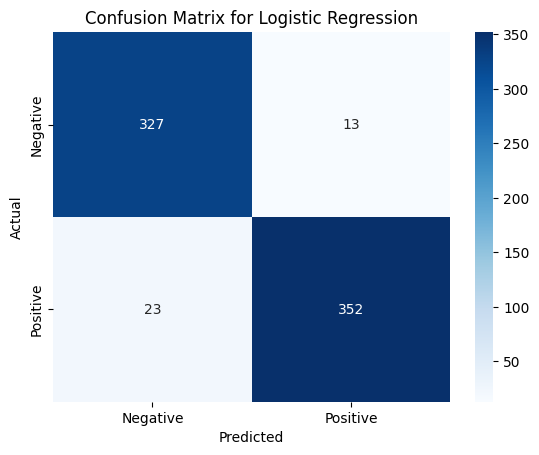

In [ ]:
# prompt: display confusion matrix for this

# Create a confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')

# Show the plot
plt.show()


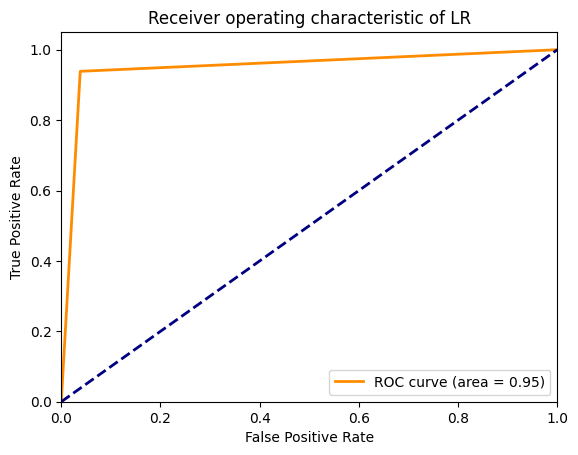

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of LR')
plt.legend(loc="lower right")
plt.show()


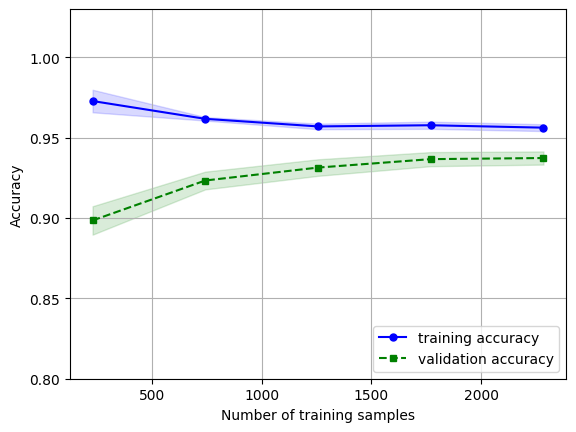

In [ ]:
# prompt: learning curve for this

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Define the training sizes
train_sizes, train_scores, test_scores = learning_curve(logreg, X_train_reshaped, y_train, cv=5)

# Calculate the mean and standard deviation of the training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

# Add labels and title
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.show()
